In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from skimage.measure import label, regionprops
from scipy.ndimage import binary_dilation
from scipy.ndimage import gaussian_filter

In [12]:
img1 = plt.imread("./Txn_25min_s3c0.tif")

img2 = plt.imread("./Txn_25min_s3c1.tif")

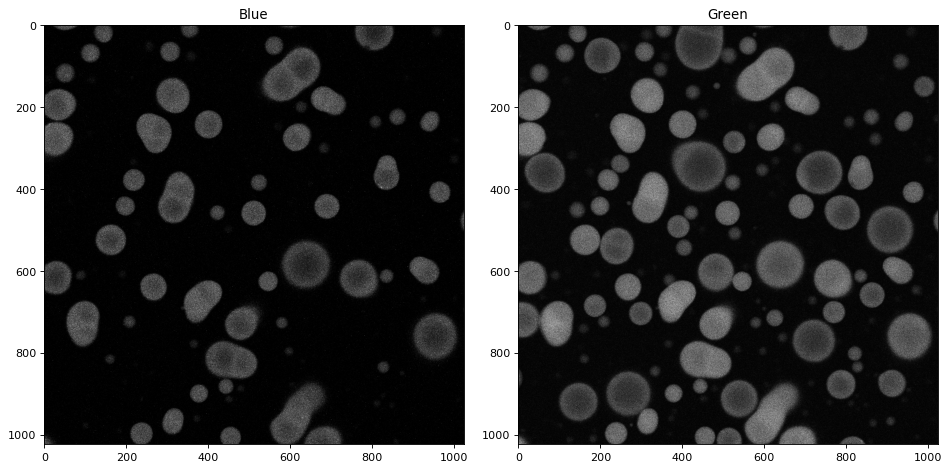

In [13]:
plt.figure(figsize = (12, 6), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Blue")
plt.imshow(img1, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title("Green")
plt.imshow(img2, cmap = 'gray')

plt.tight_layout()
plt.show()

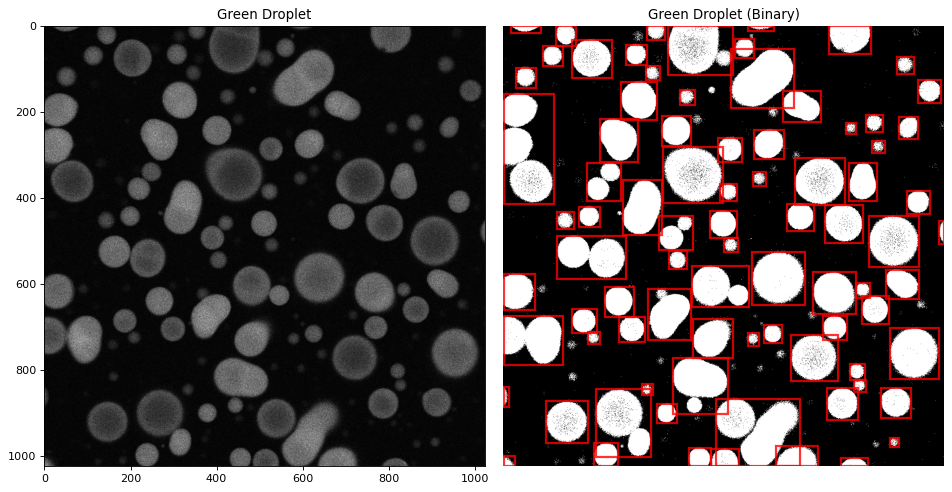

In [14]:
# Create Binary for better signal to noise
binary = img2 > (img2.mean() + 0.0*img2.std())

# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# Remove small blobs
droplets = [i for i in blob_lists if i.area > 200]

plt.figure(figsize = (12, 6), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Green Droplet")
plt.imshow(img2, cmap = 'gray')

ax = plt.subplot(1, 2, 2)
plt.title("Green Droplet (Binary)")
plt.imshow(binary, cmap = 'gray')
for i in droplets:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

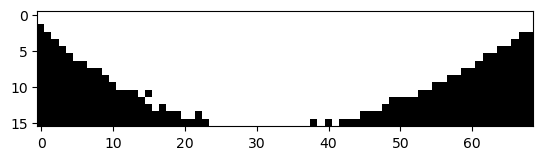

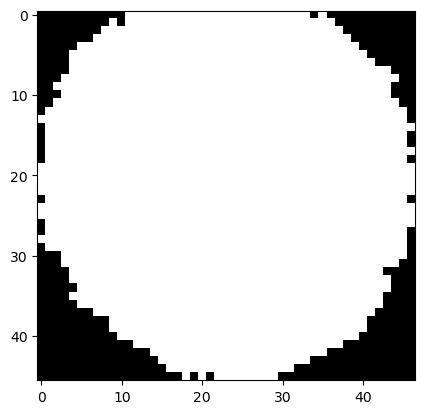

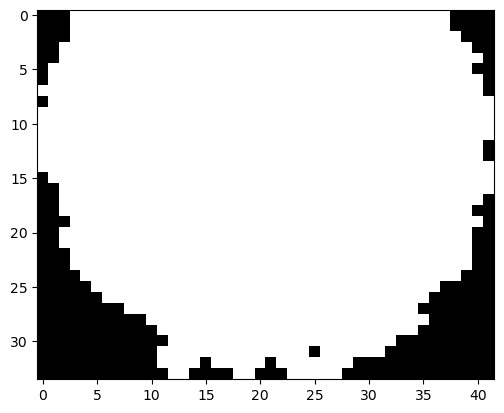

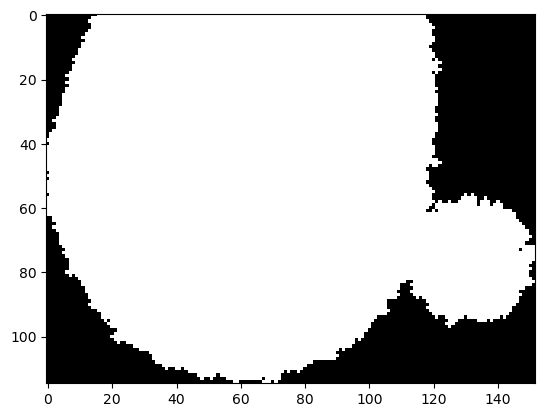

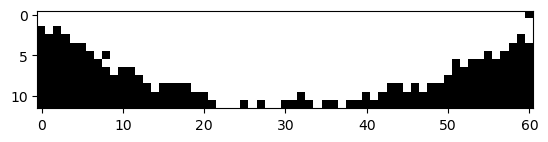

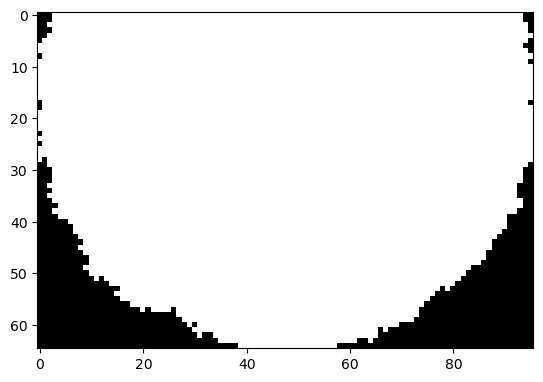

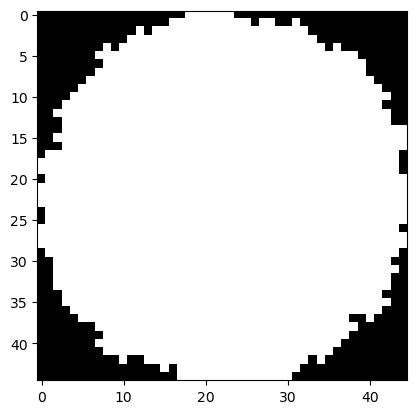

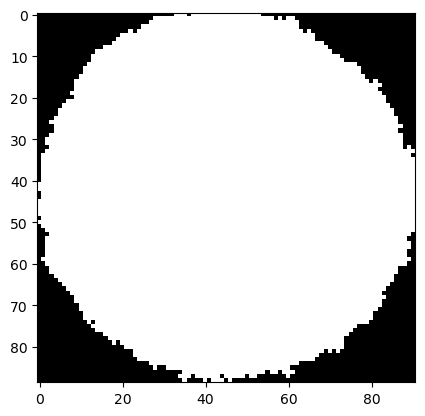

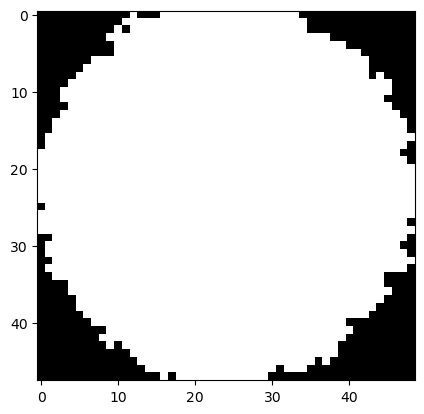

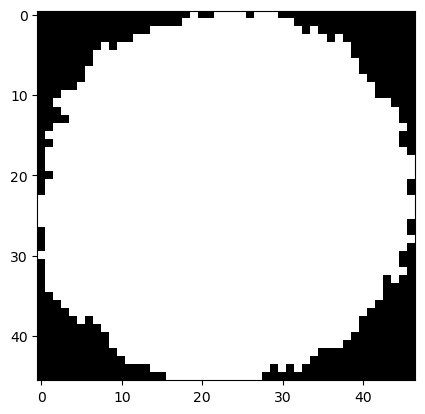

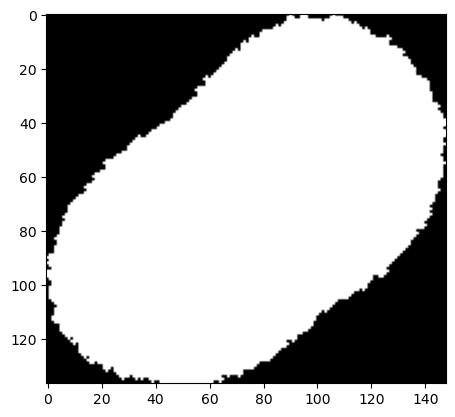

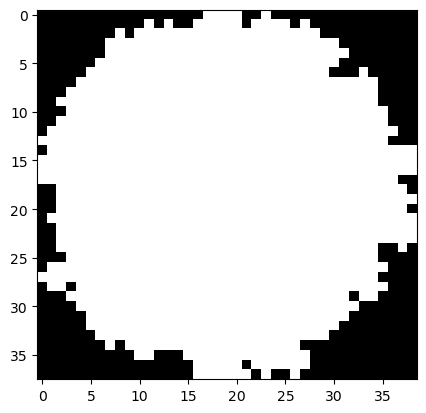

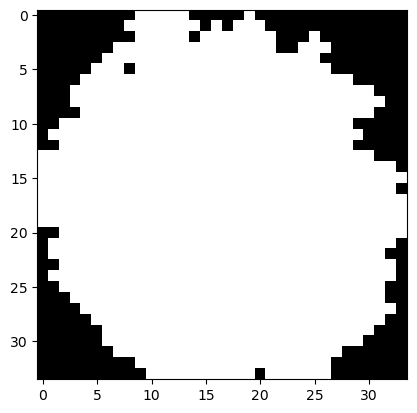

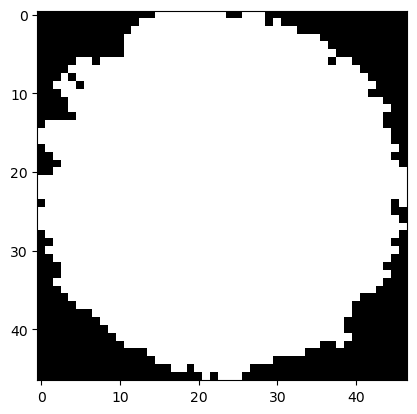

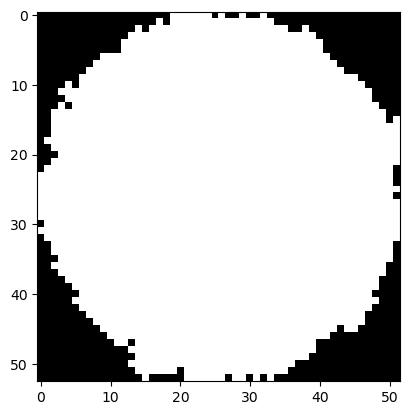

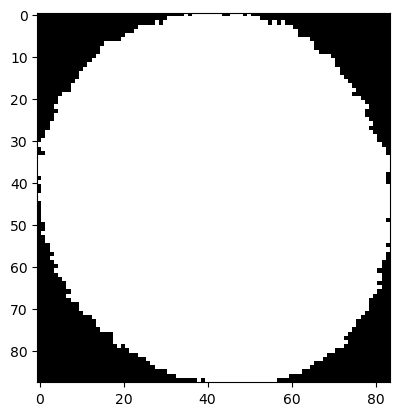

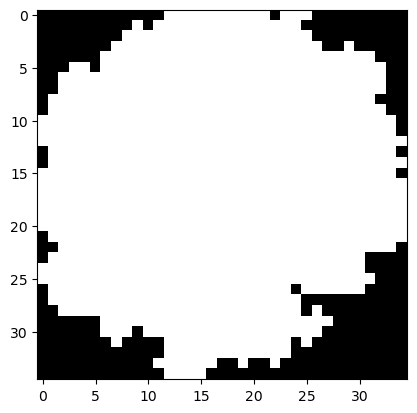

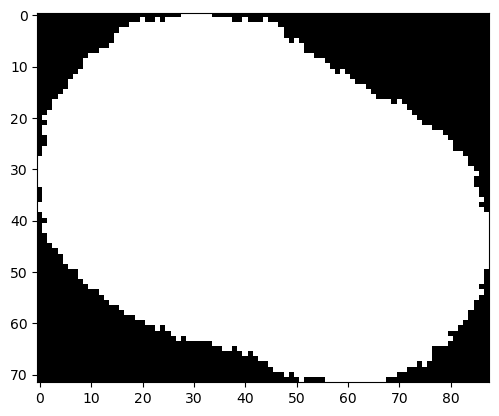

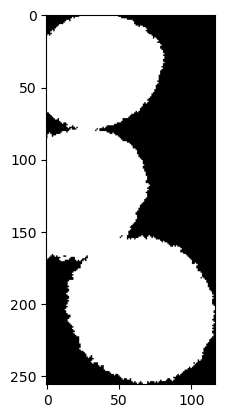

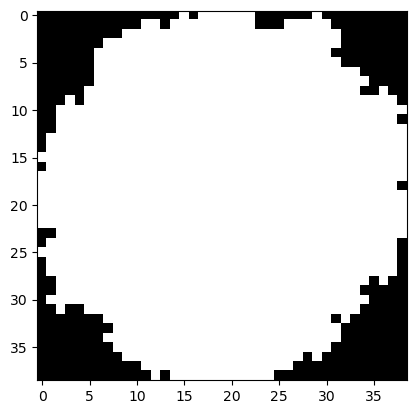

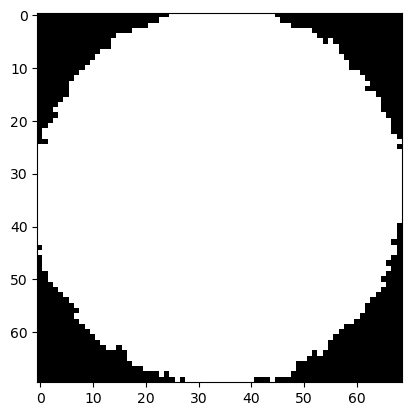

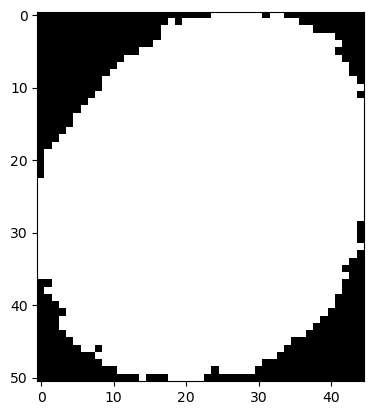

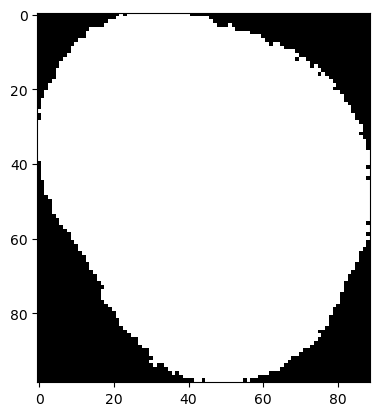

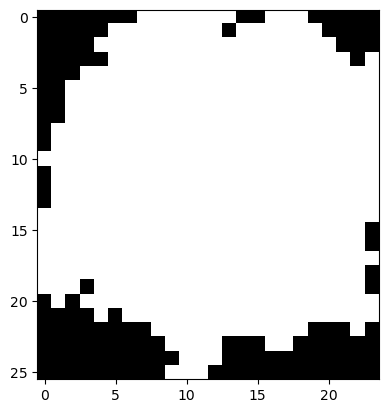

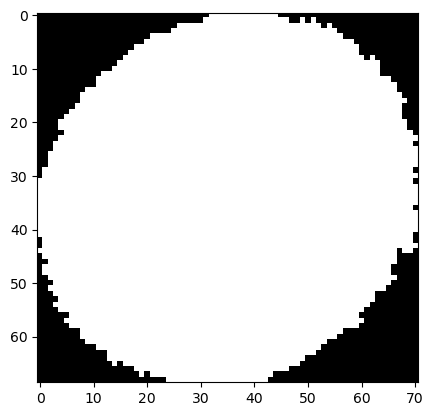

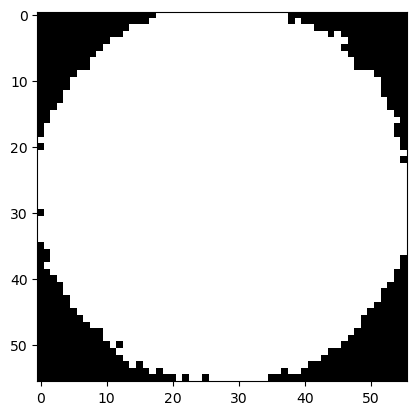

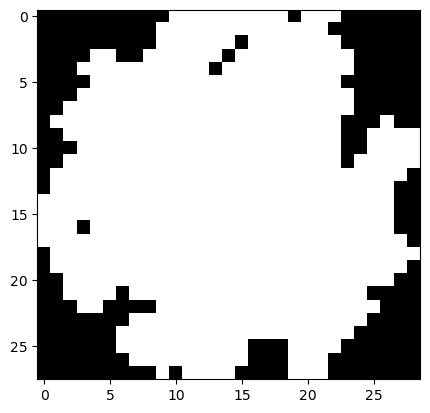

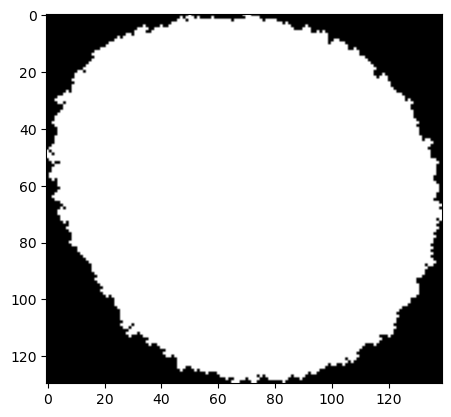

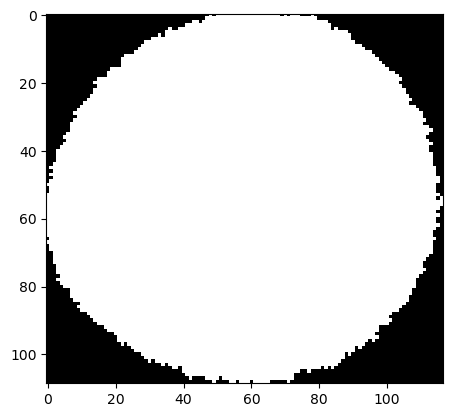

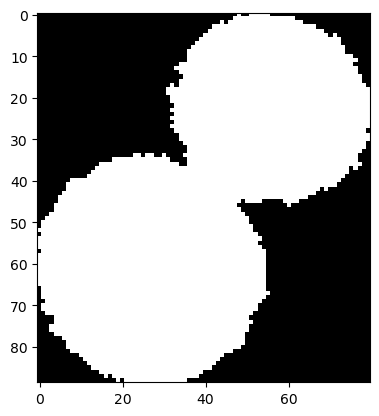

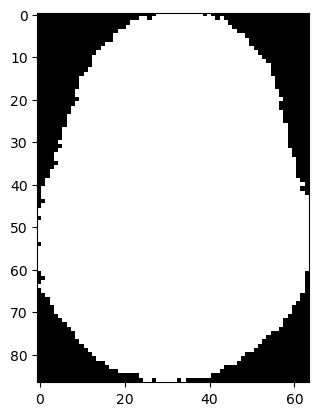

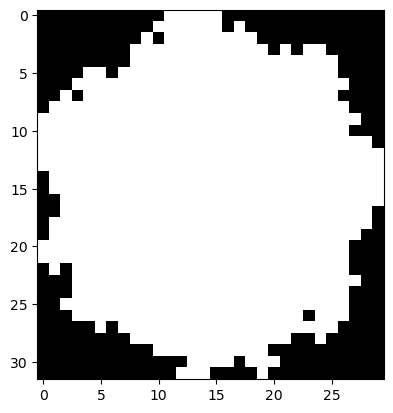

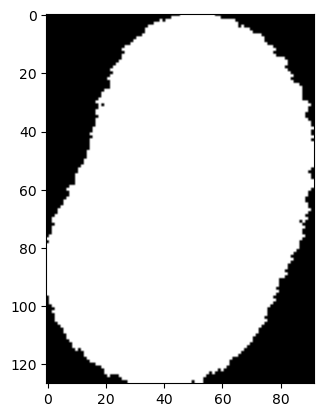

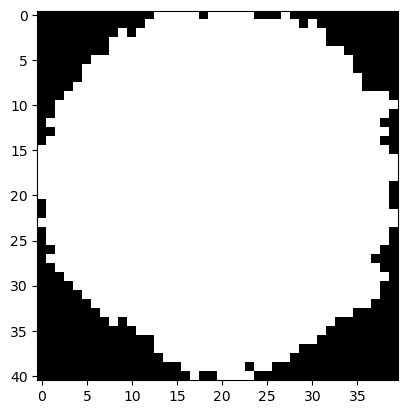

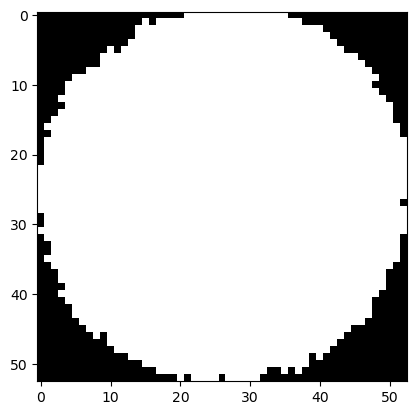

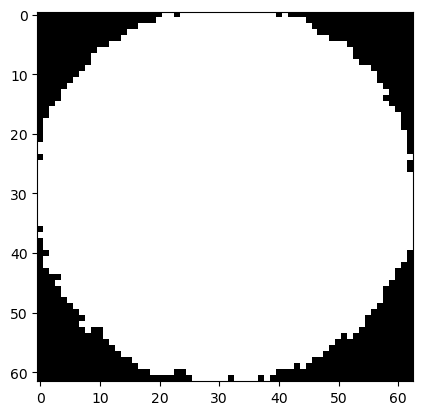

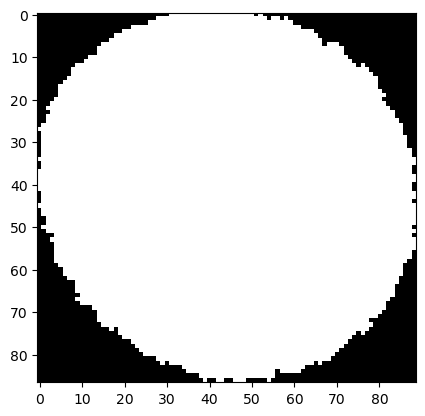

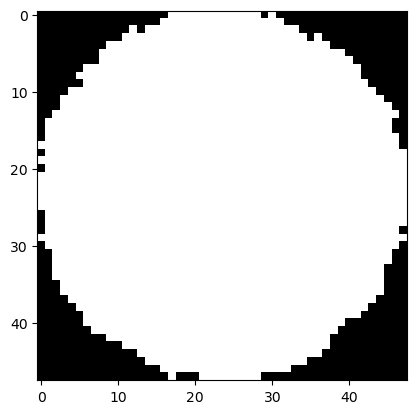

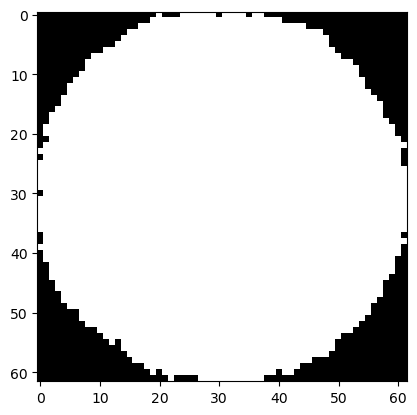

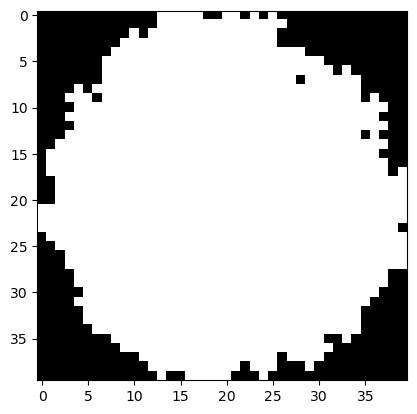

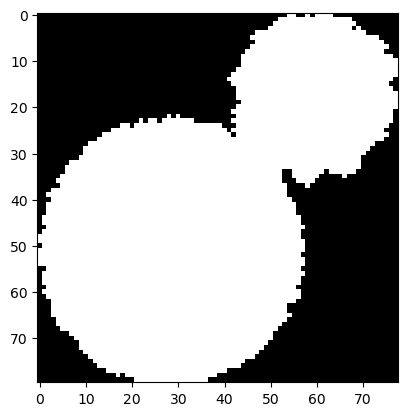

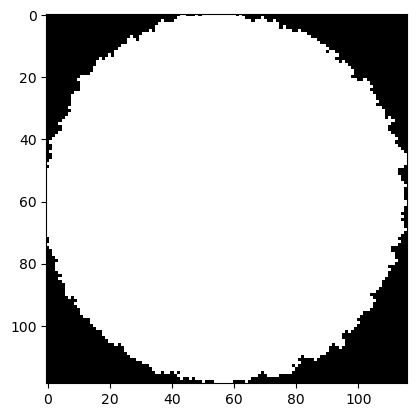

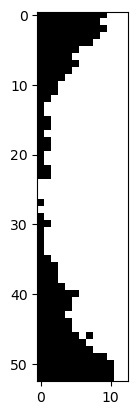

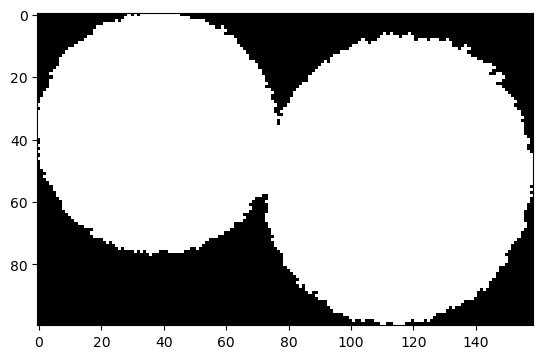

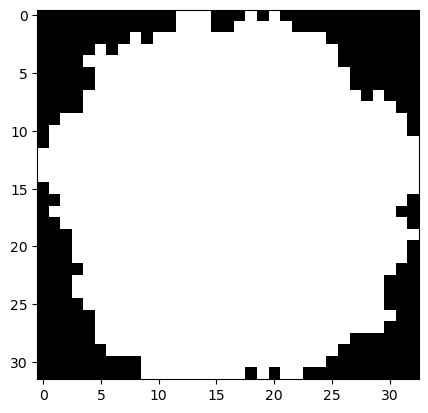

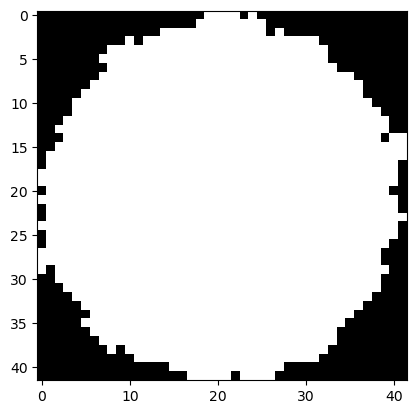

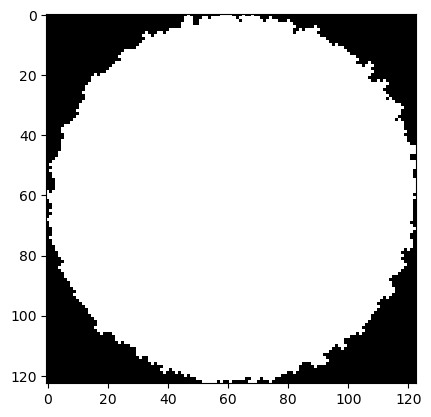

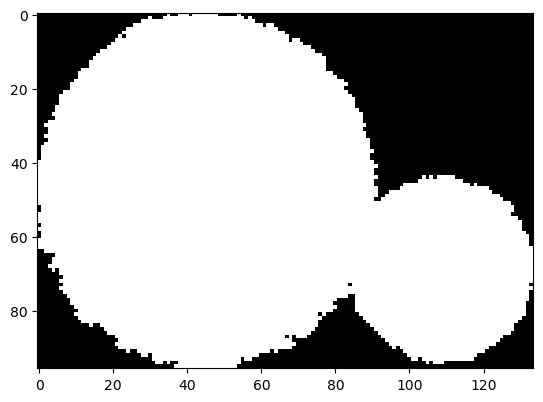

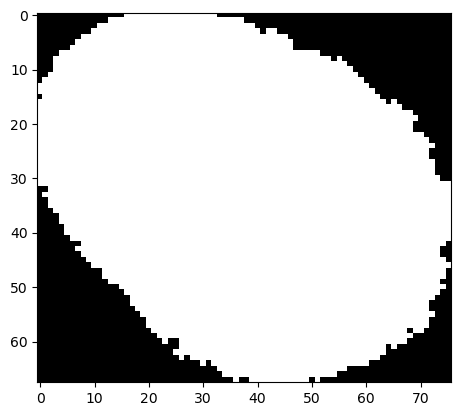

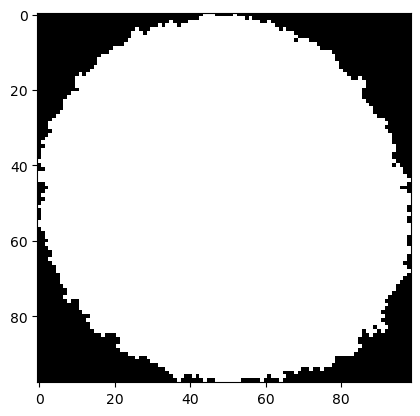

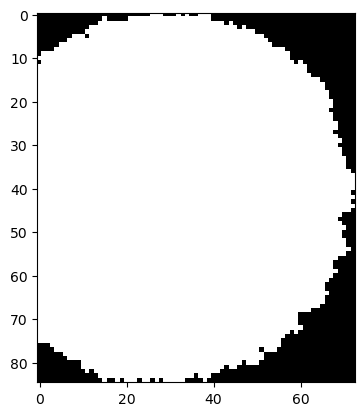

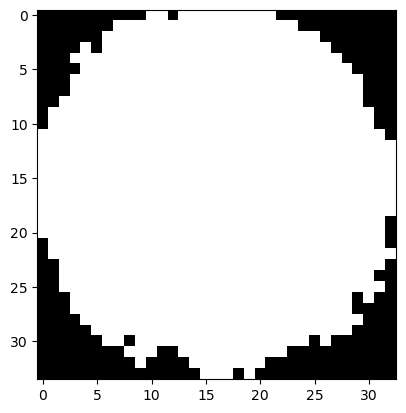

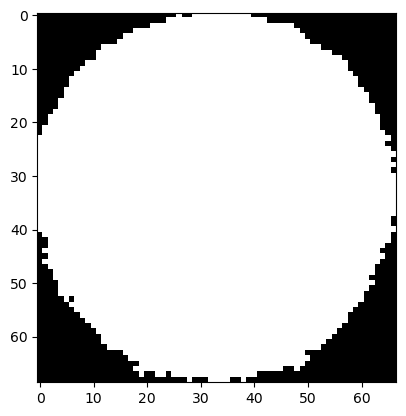

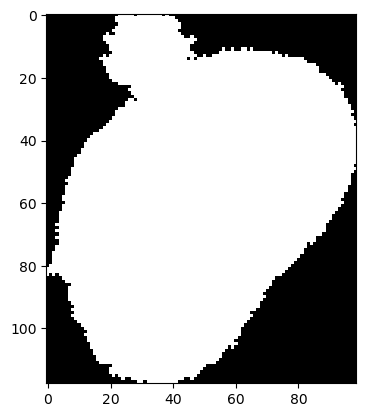

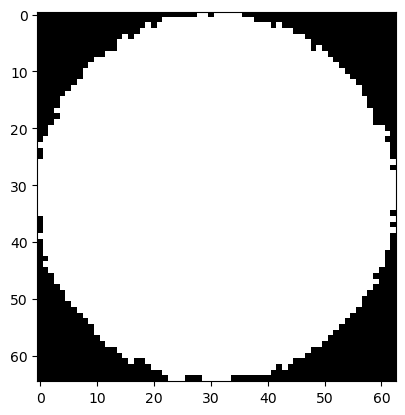

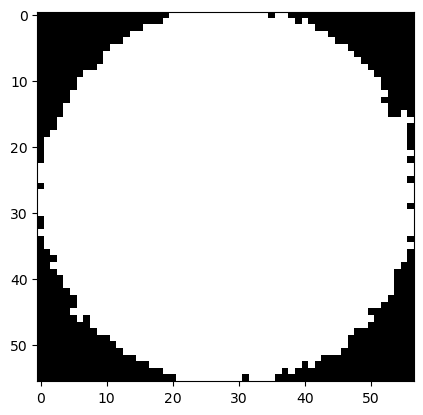

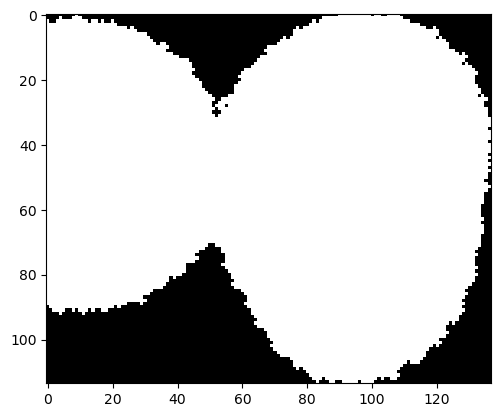

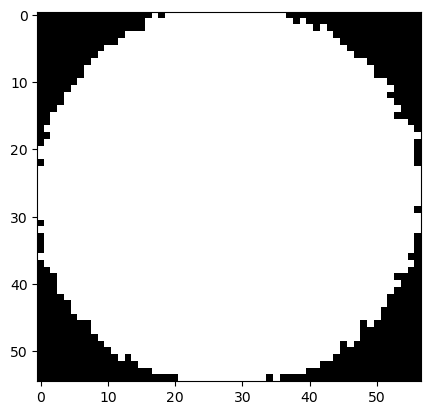

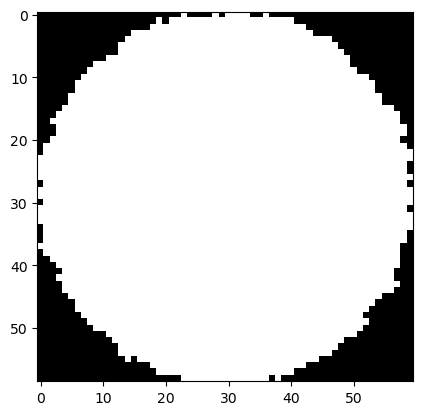

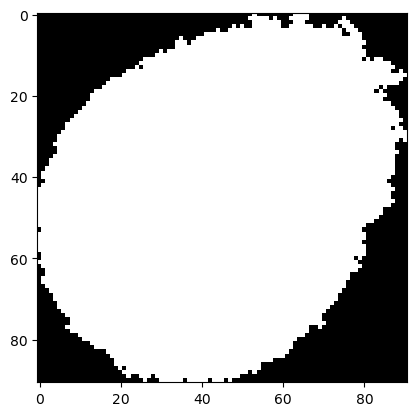

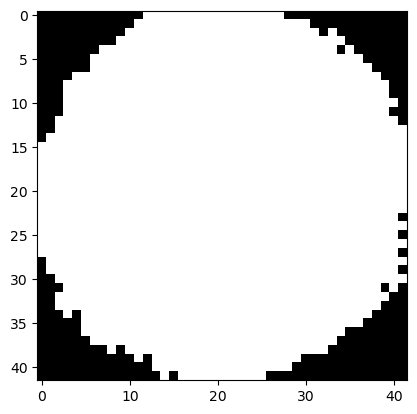

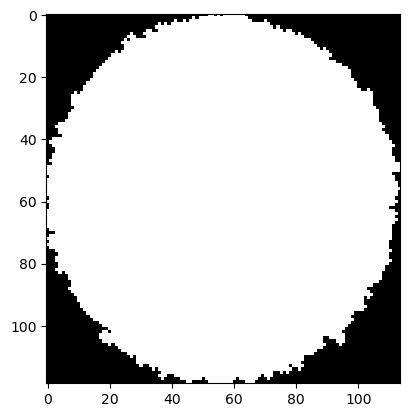

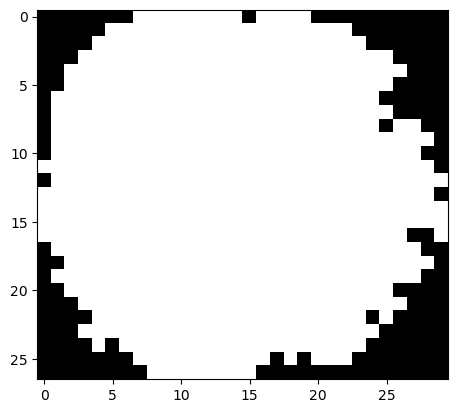

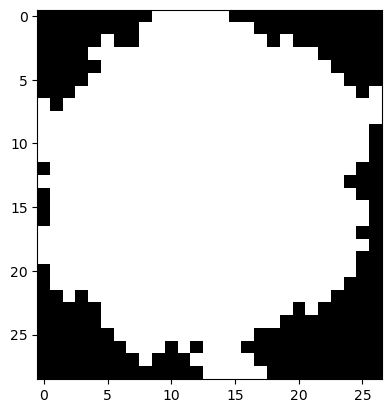

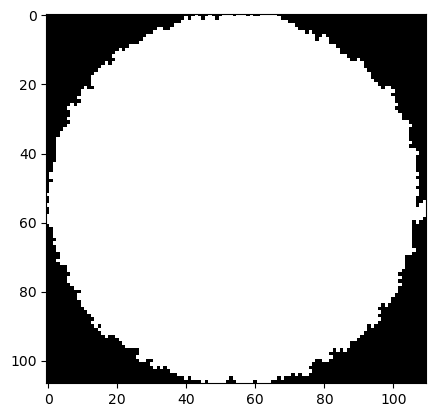

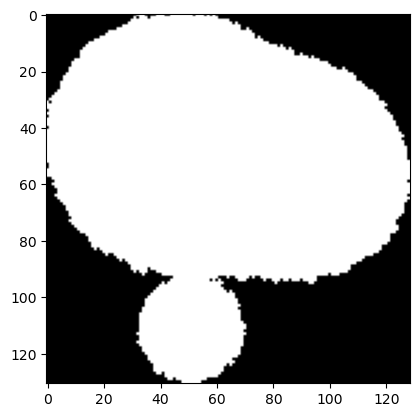

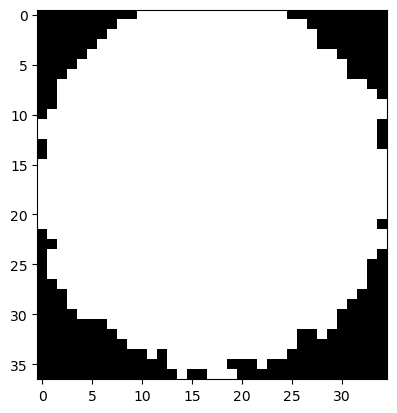

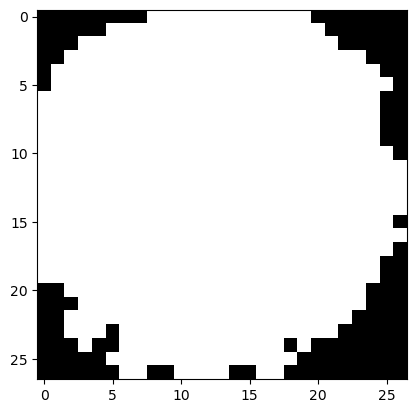

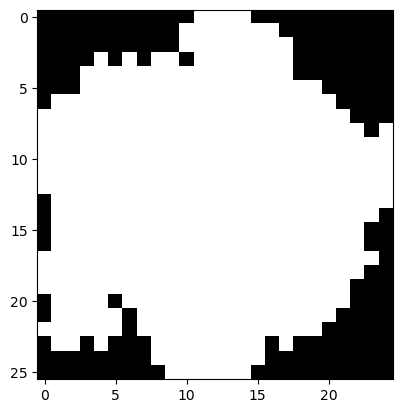

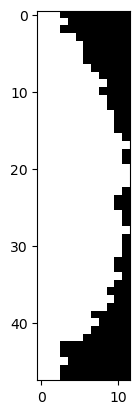

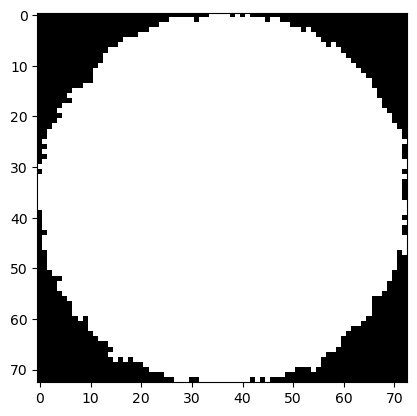

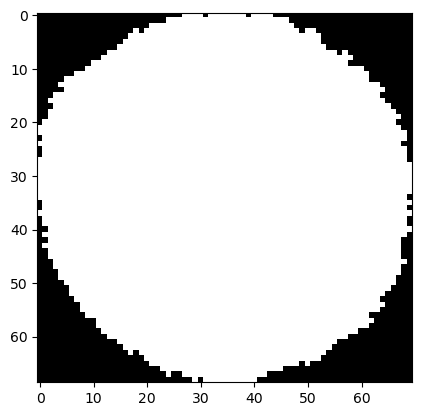

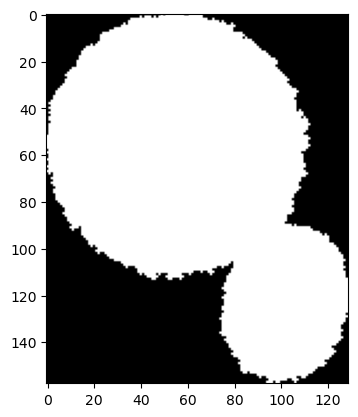

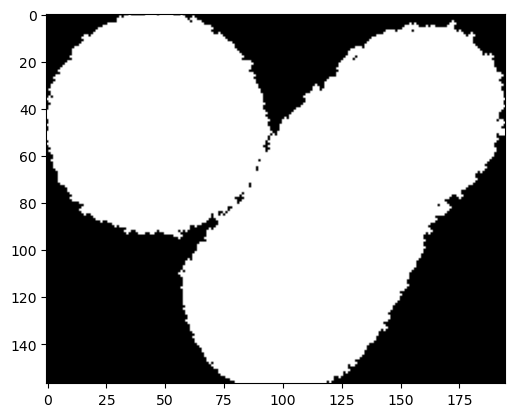

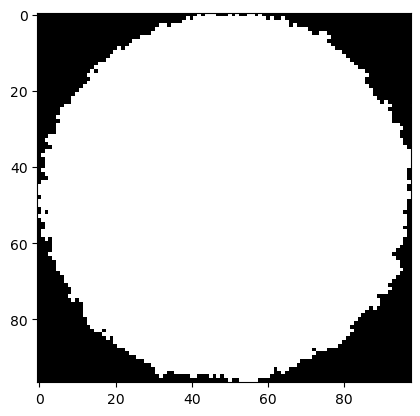

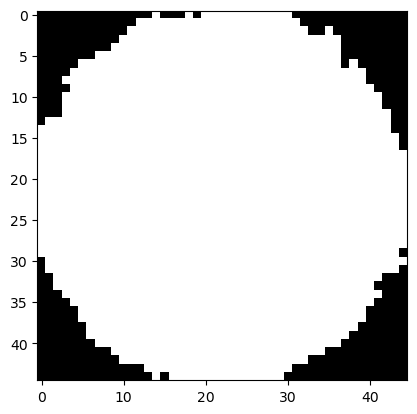

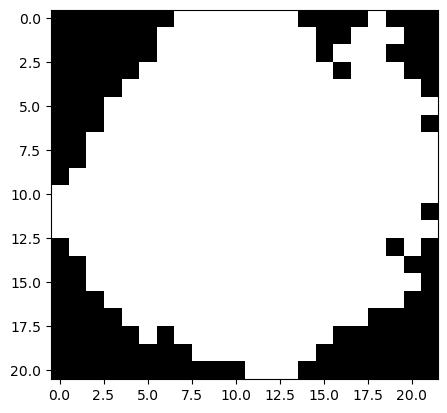

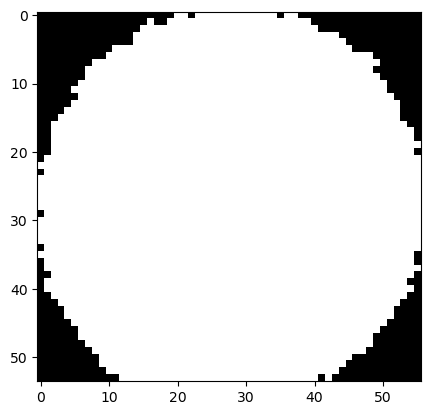

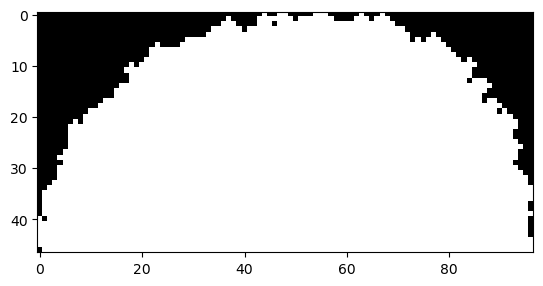

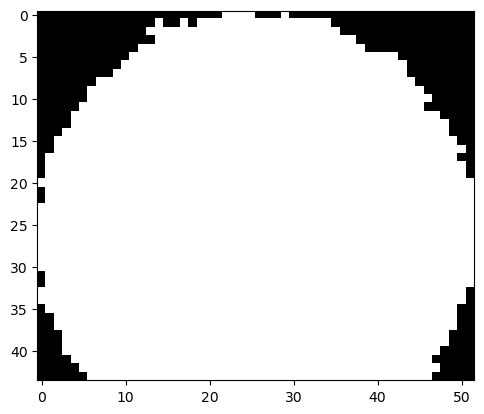

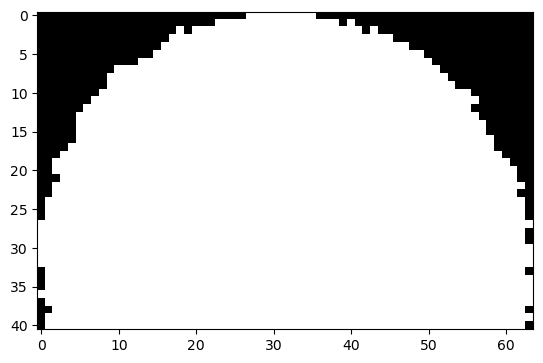

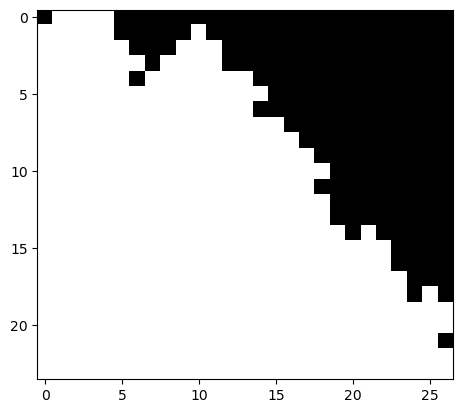

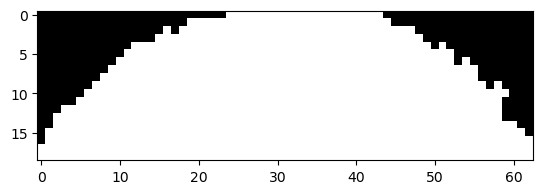

In [15]:
val1, val2 = [], []

for droplet in droplets:
    # view the blob
    plt.imshow(binary_dilation(droplet.image), cmap = 'gray')
    plt.show()
    
    # get the boundary
    minr, minc, maxr, maxc = droplet.bbox
    
    # img1 values
    blob_img = img1[minr:maxr, minc:maxc]
    vals = blob_img[binary_dilation(droplet.image)]
    val1.append(vals.flatten())
    
    # img2 values
    blob_img = img2[minr:maxr, minc:maxc]
    vals = blob_img[binary_dilation(droplet.image)]
    val2.append(vals.flatten())



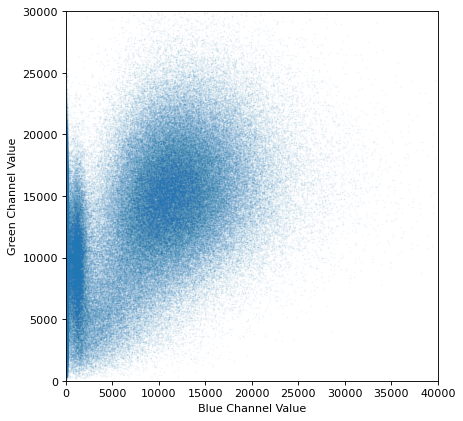

In [16]:
plt.figure(figsize=(6,6), dpi = 80)
plt.scatter([val for ary in val1 for val in ary], [val for ary in val2 for val in ary], alpha = 0.1, s = .1)
# plt.scatter(16000, 20000, alpha = 1, s = 1)
# plt.title("After Transcription")
plt.xlabel("Blue Channel Value")
plt.ylabel("Green Channel Value")
plt.xlim(0, 40000)
plt.ylim(0, 30000)
# plt.savefig('25min_Txn_Scatter.pdf', dpi=80)
plt.show()

Case 2

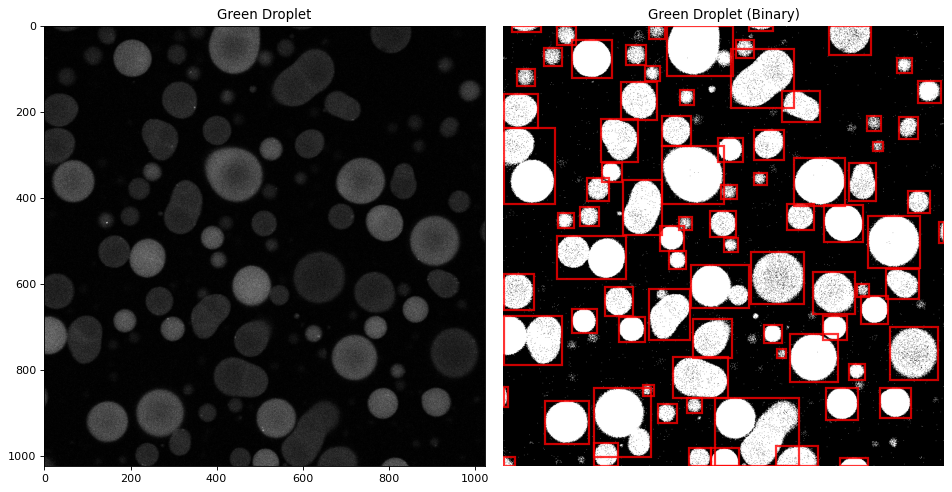

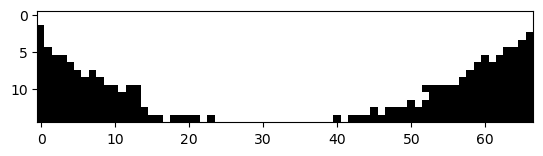

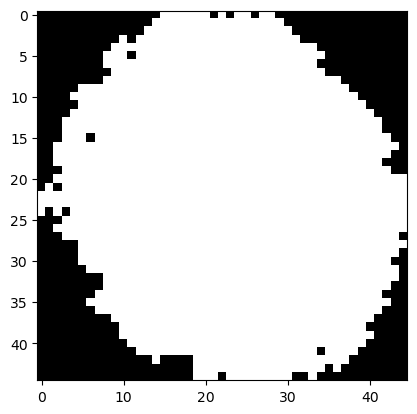

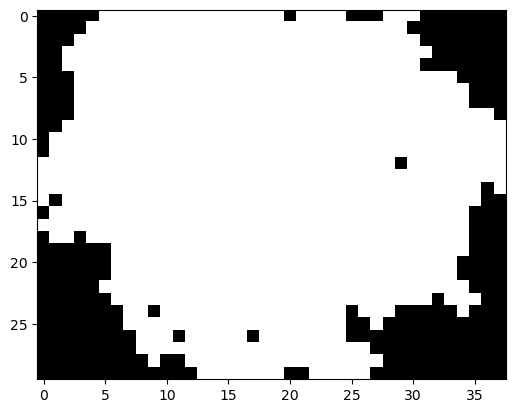

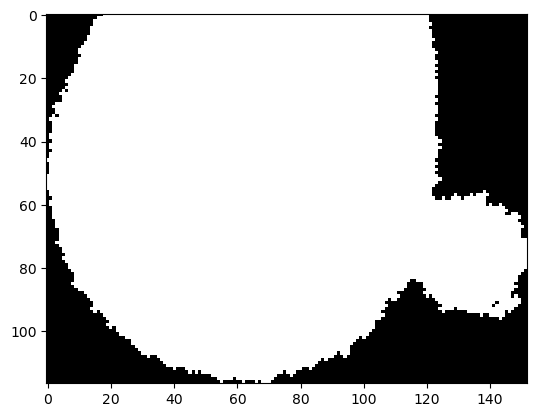

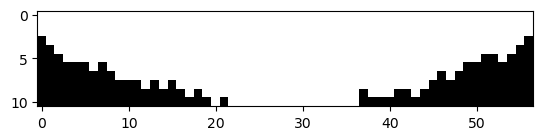

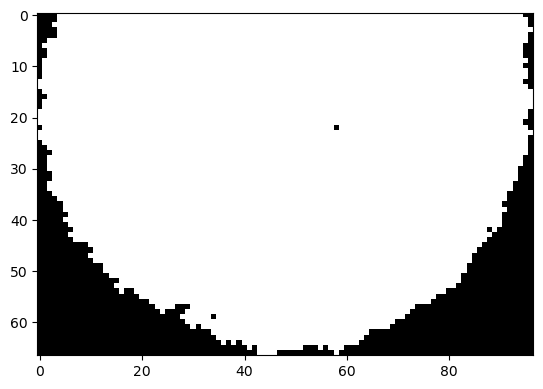

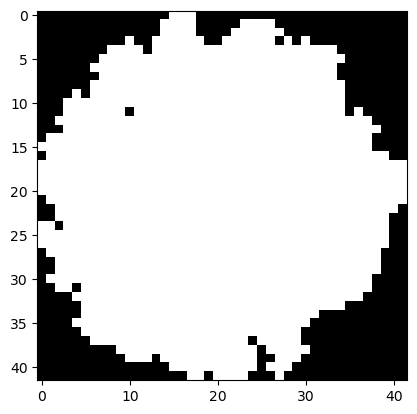

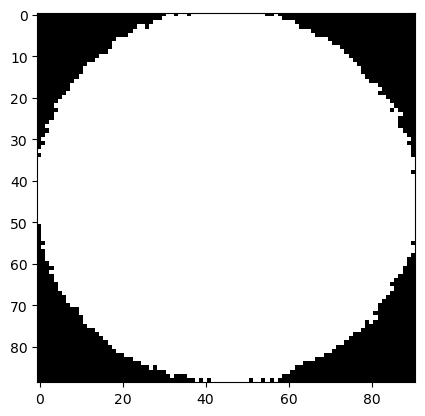

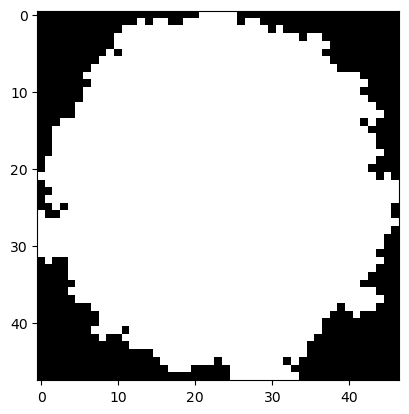

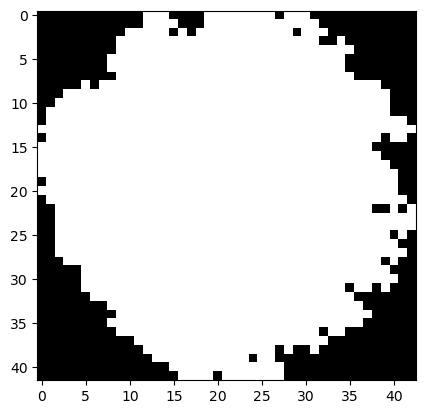

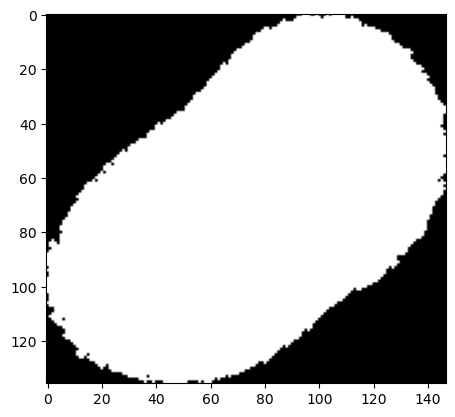

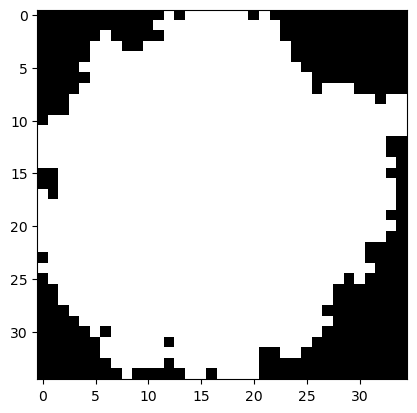

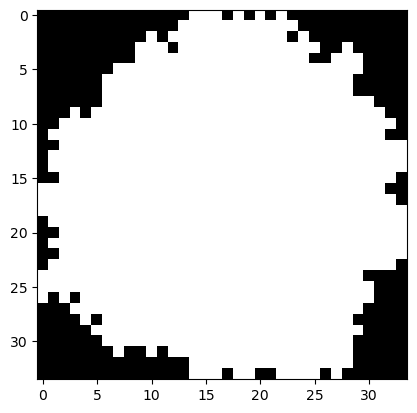

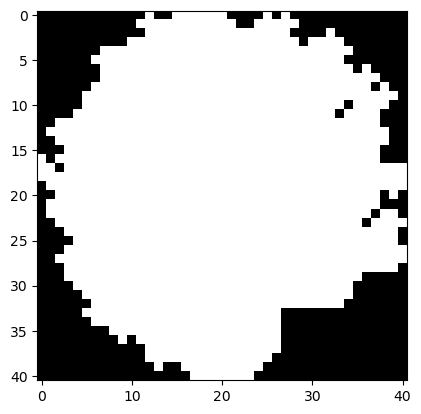

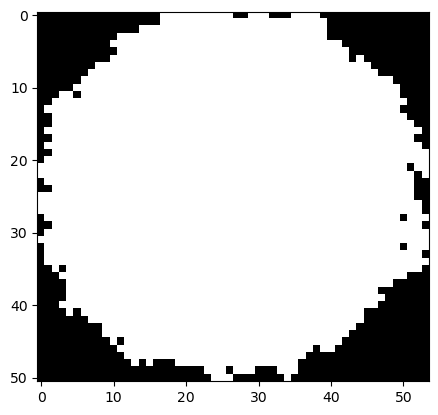

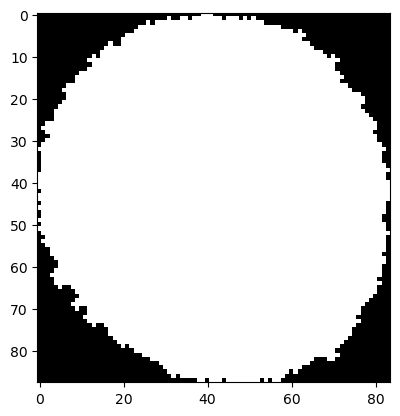

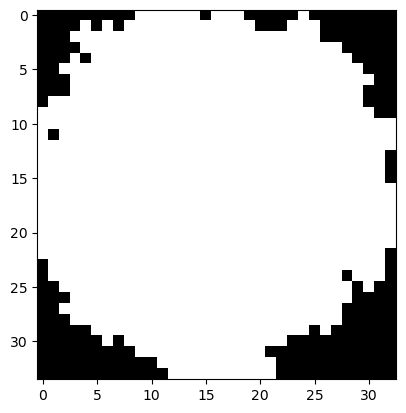

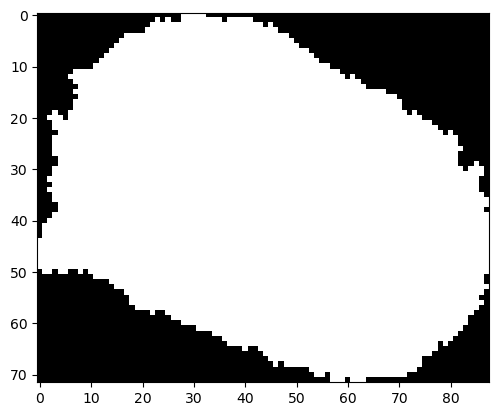

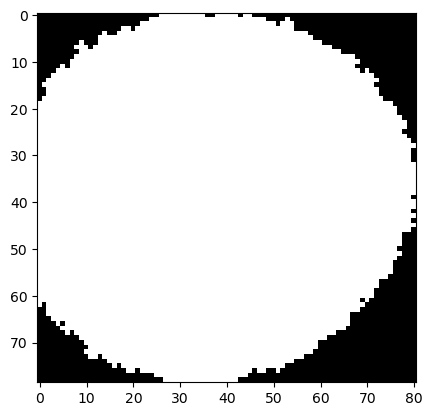

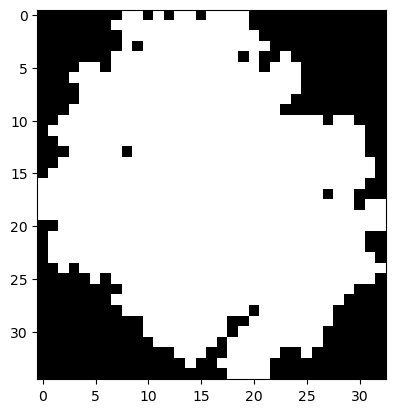

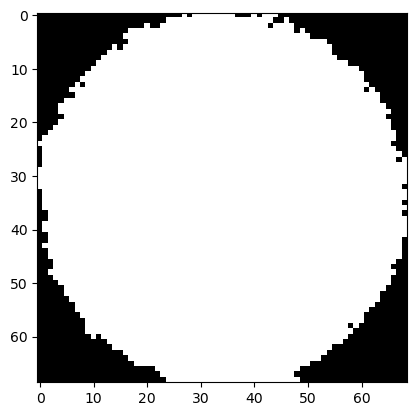

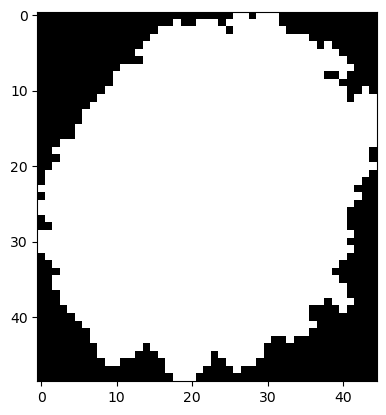

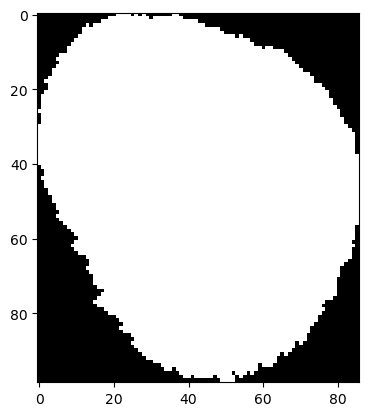

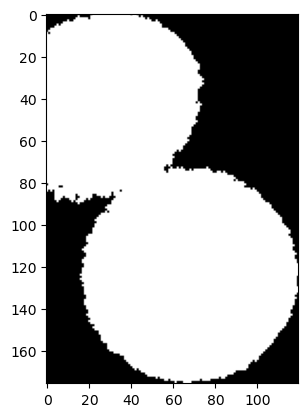

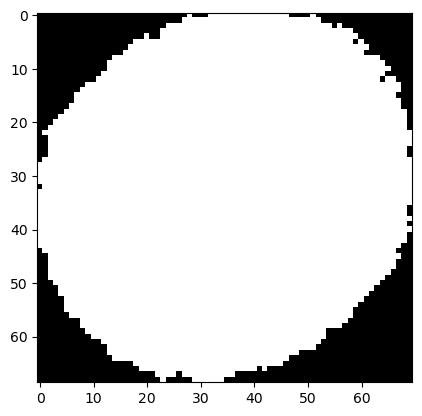

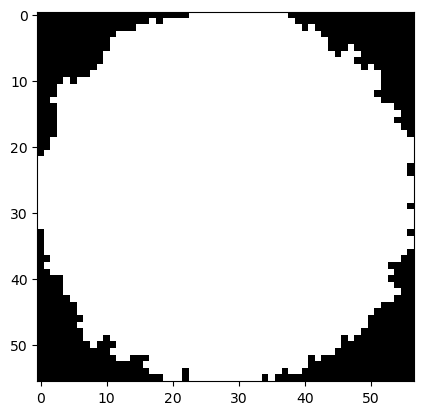

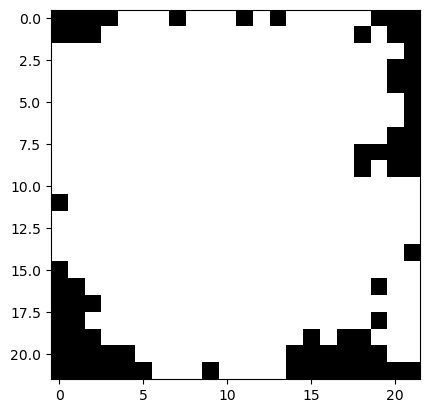

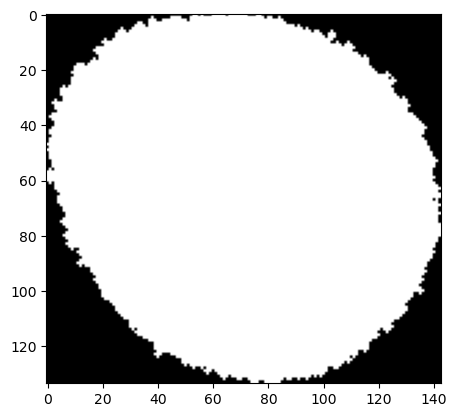

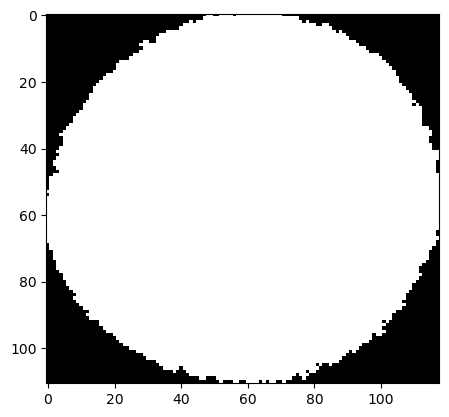

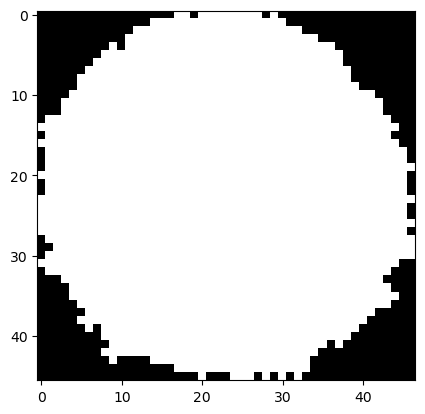

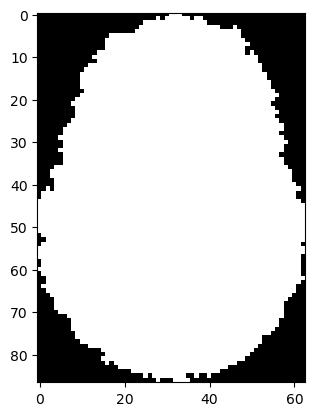

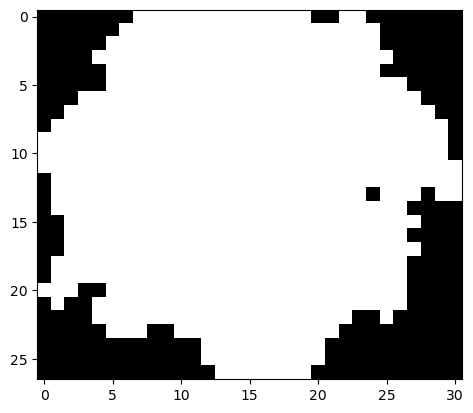

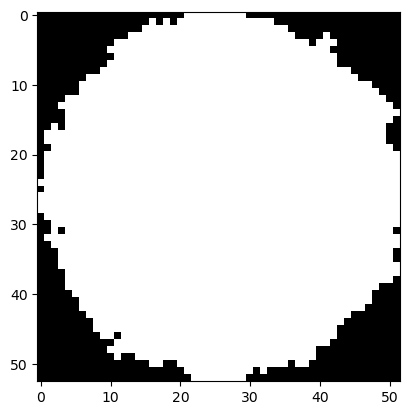

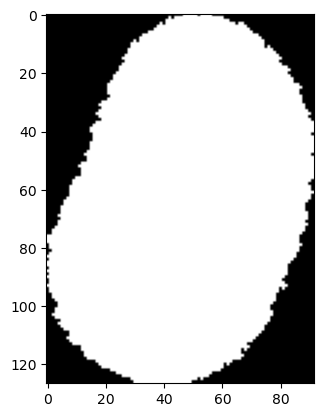

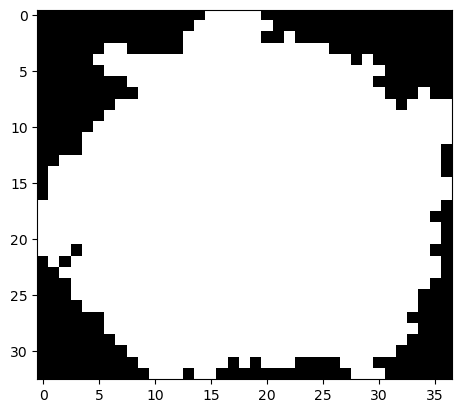

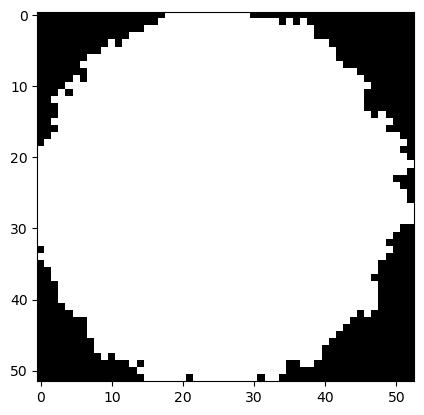

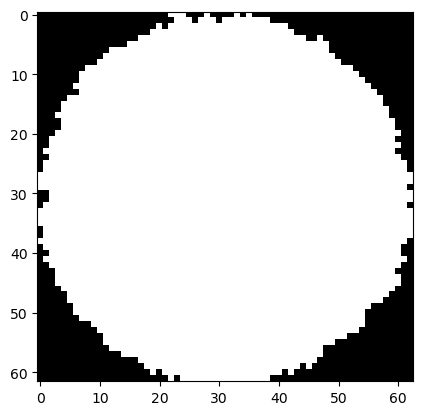

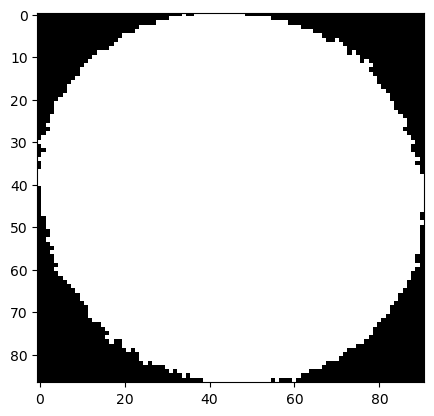

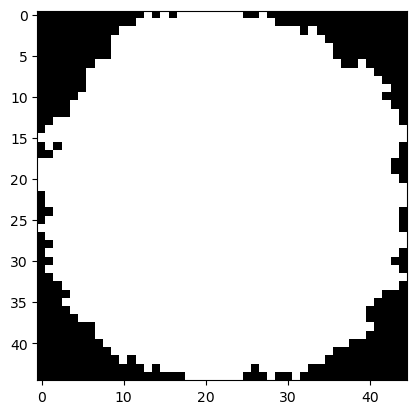

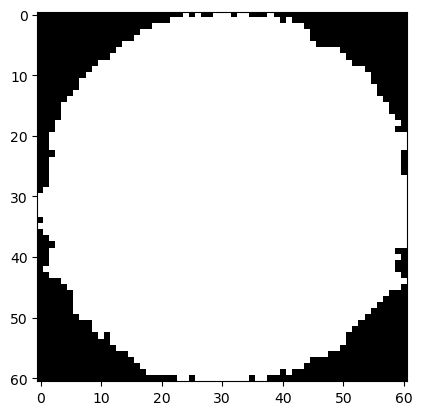

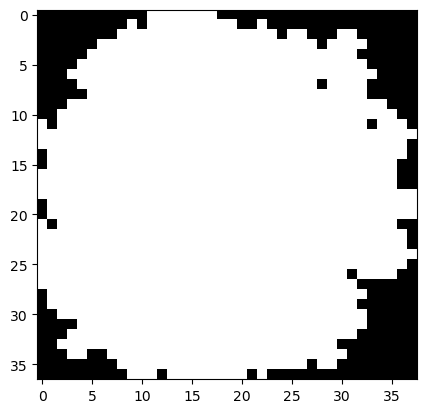

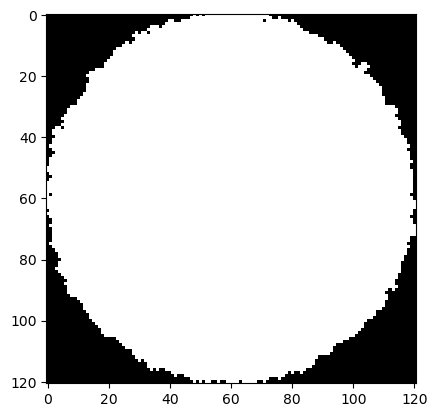

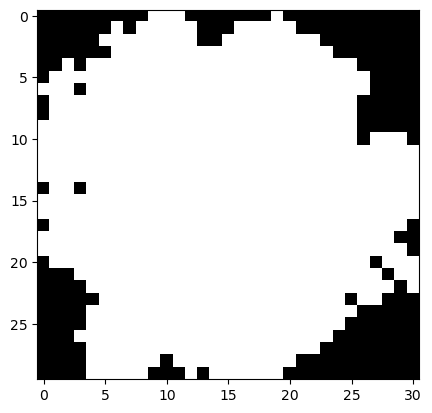

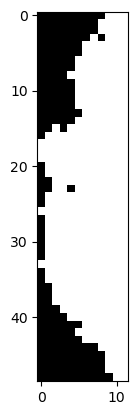

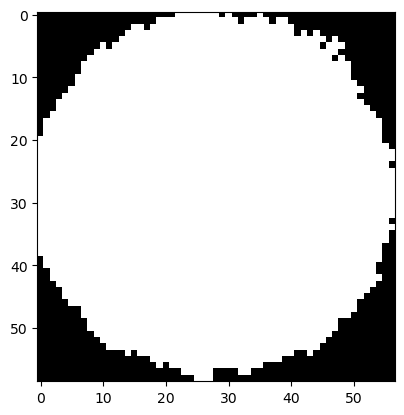

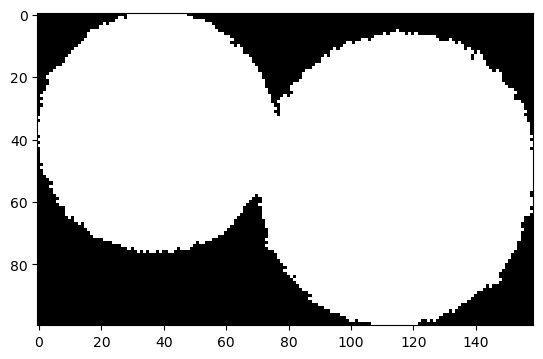

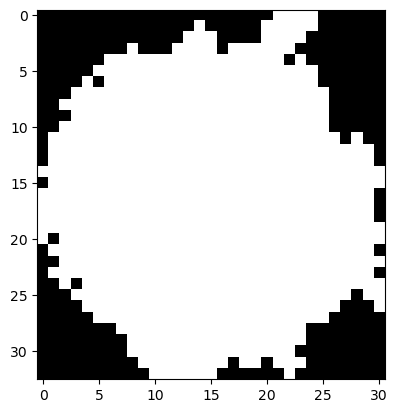

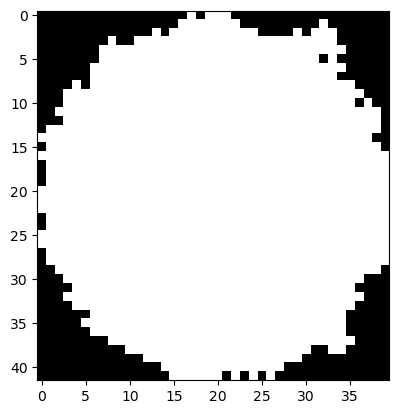

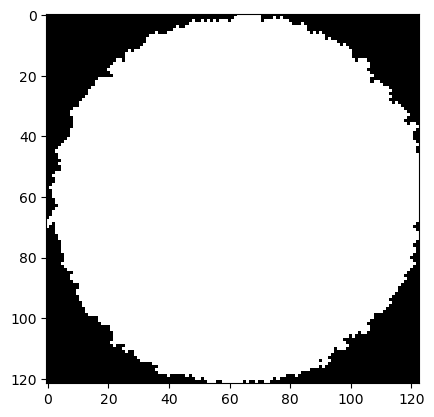

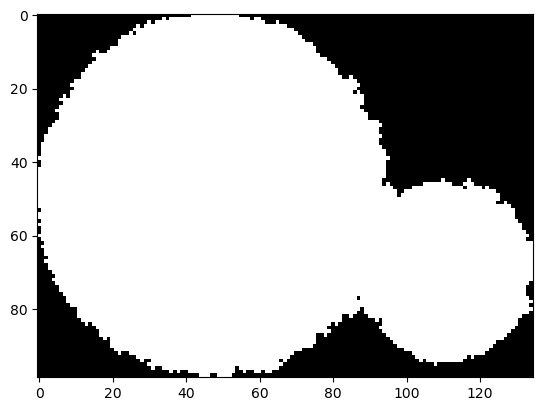

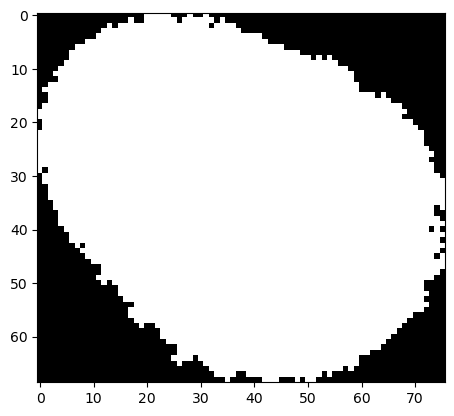

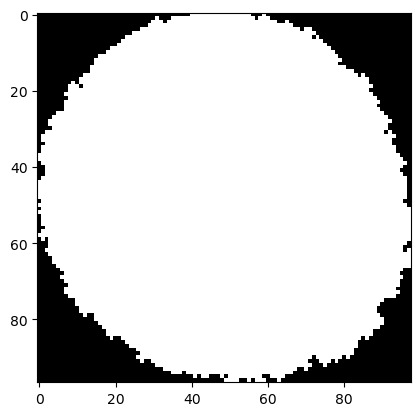

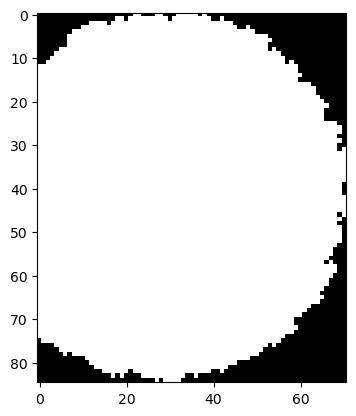

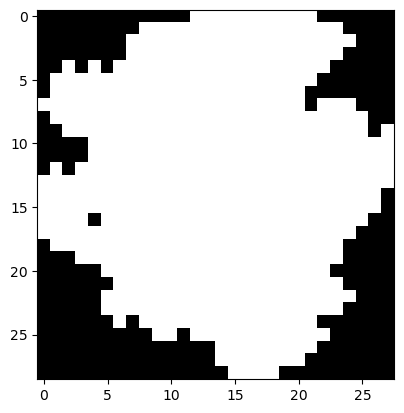

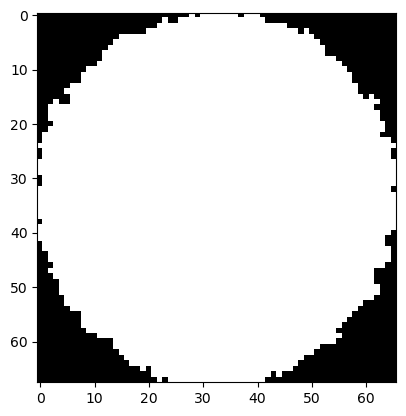

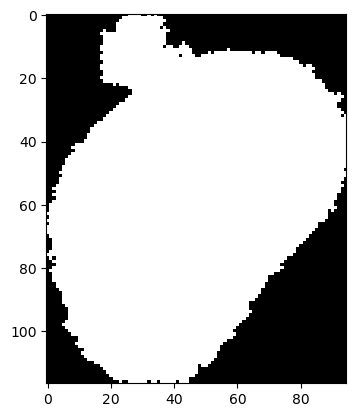

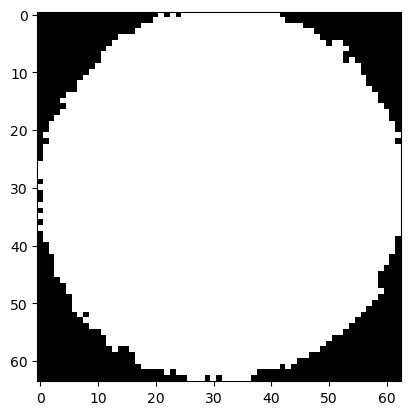

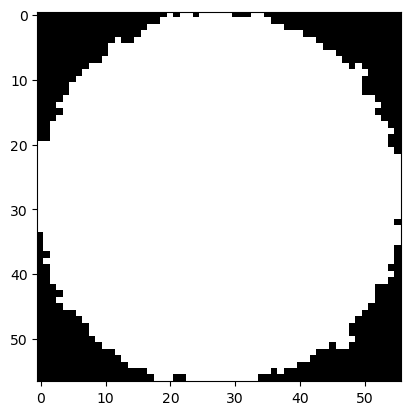

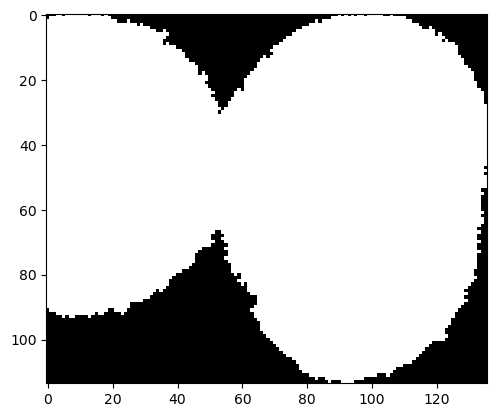

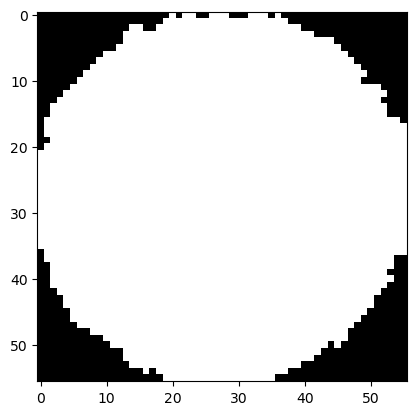

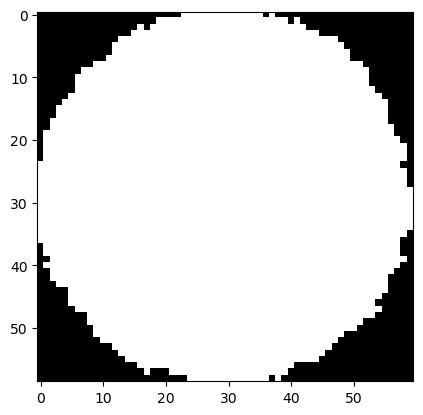

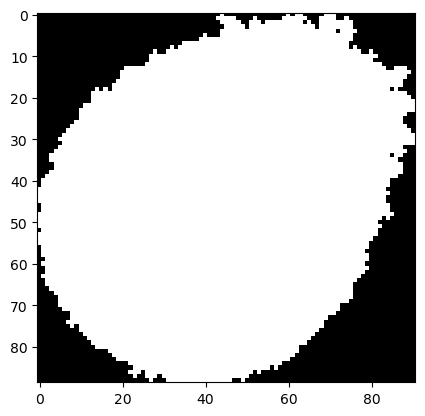

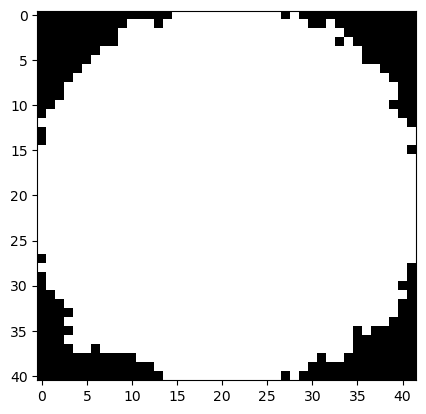

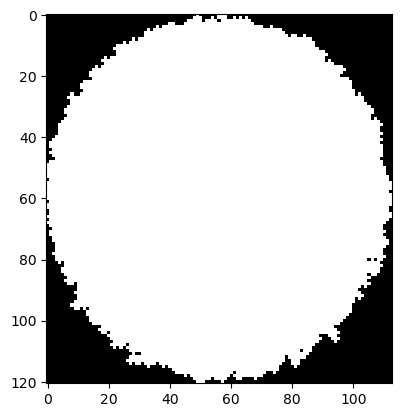

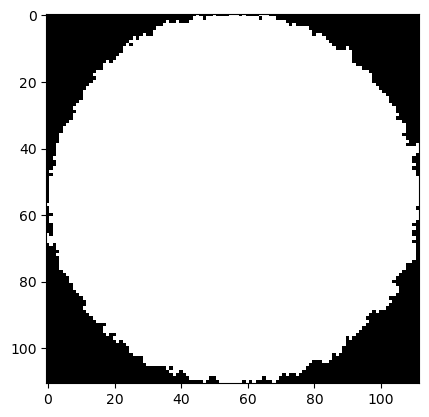

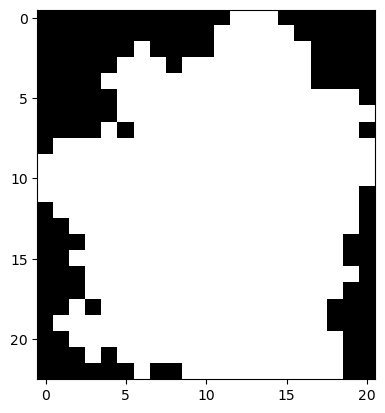

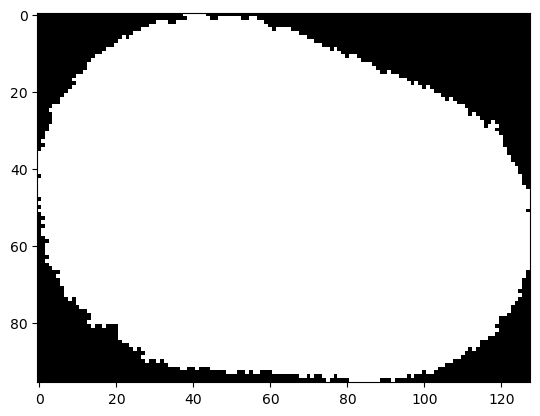

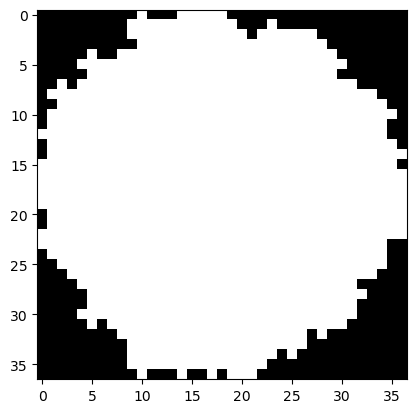

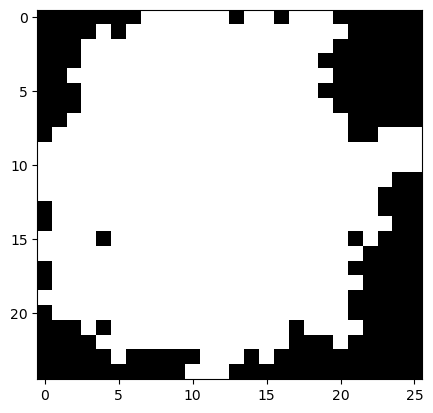

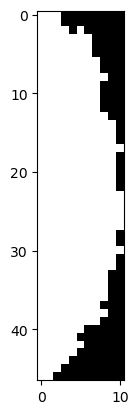

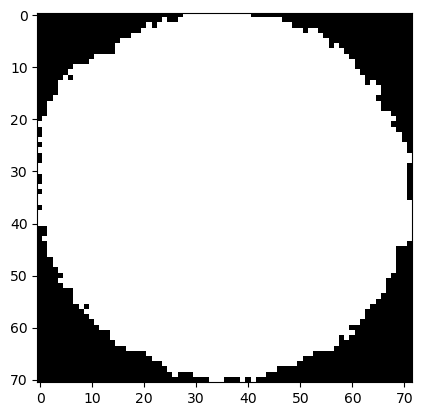

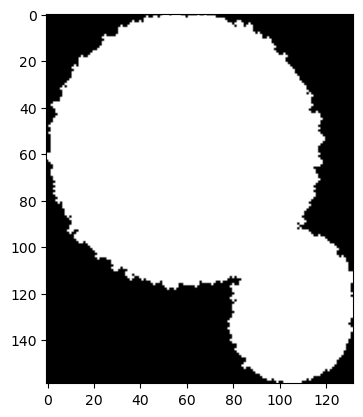

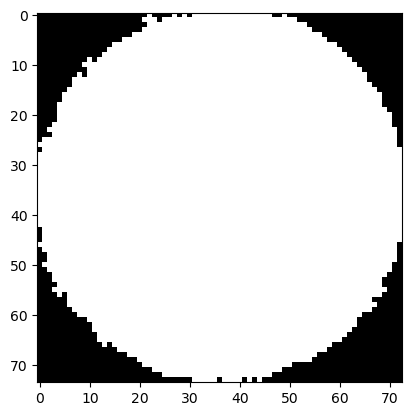

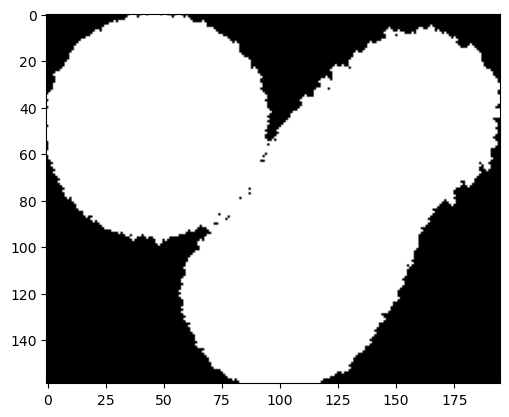

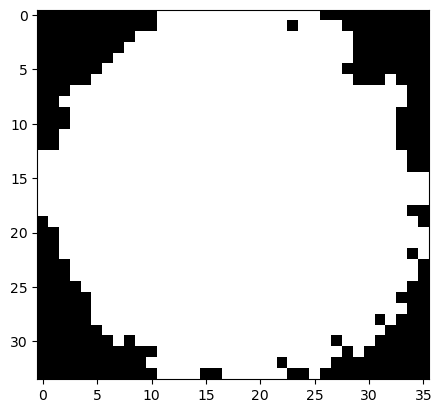

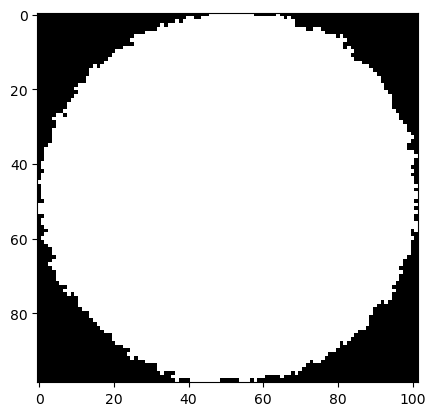

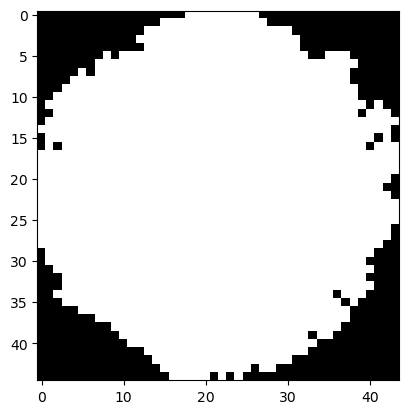

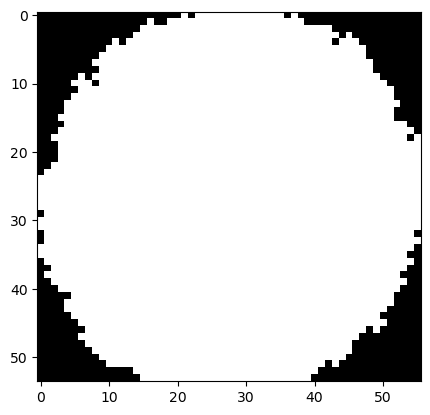

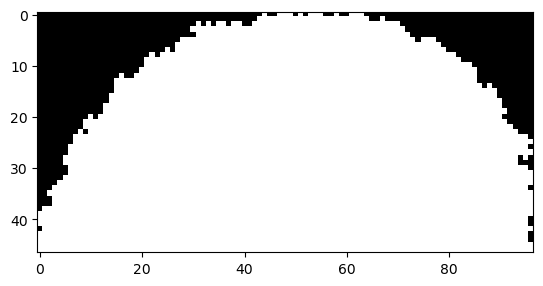

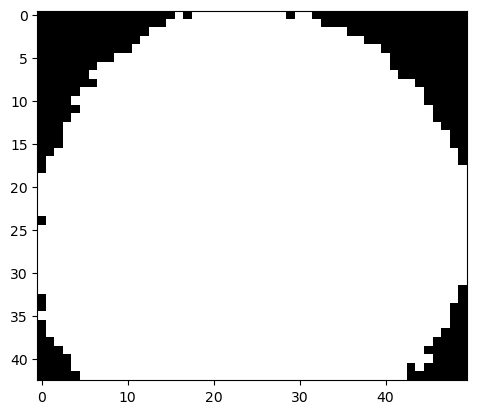

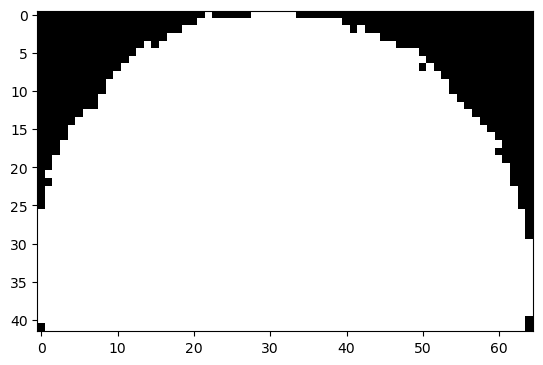

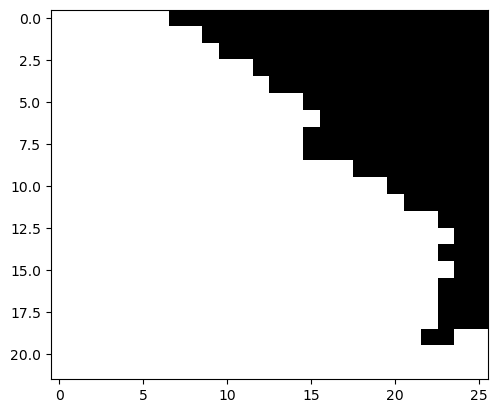

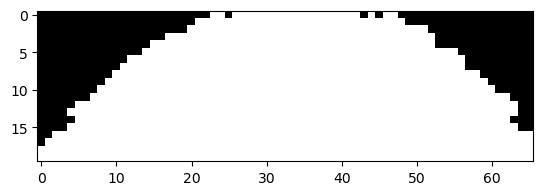

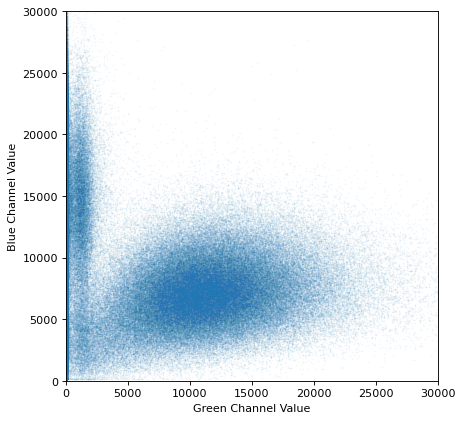

In [60]:
img1 = plt.imread("./Txn_25min_s3c0.tif")

img2 = plt.imread("./Txn_25min_s3c2.tif")
# img3 = plt.imread("./Txn_25min_s3c3.tif")

# Create Binary for better signal to noise
binary = img2 > (img2.mean() + 0.0*img2.std())

# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# Remove small blobs
droplets = [i for i in blob_lists if i.area > 200]

plt.figure(figsize = (12, 6), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Green Droplet")
plt.imshow(img2, cmap = 'gray')

ax = plt.subplot(1, 2, 2)
plt.title("Green Droplet (Binary)")
plt.imshow(binary, cmap = 'gray')
for i in droplets:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

val1, val2 = [], []

for droplet in droplets:
    # view the blob
    plt.imshow(binary_dilation(droplet.image), cmap = 'gray')
    plt.show()
    
    # get the boundary
    minr, minc, maxr, maxc = droplet.bbox
    
    # img1 values
    blob_img = img1[minr:maxr, minc:maxc]
    vals = blob_img[binary_dilation(droplet.image)]
    val1.append(vals.flatten())
    
    # img2 values
    blob_img = img2[minr:maxr, minc:maxc]
    vals = blob_img[binary_dilation(droplet.image)]
    val2.append(vals.flatten())

plt.figure(figsize=(6, 6), dpi = 80)
plt.scatter([val for ary in val1 for val in ary], [val for ary in val2 for val in ary], alpha = .1, s = .1)
plt.xlabel("Green Channel Value")
plt.ylabel("Blue Channel Value")
plt.xlim(0, 30000)
plt.ylim(0, 30000)
plt.show()

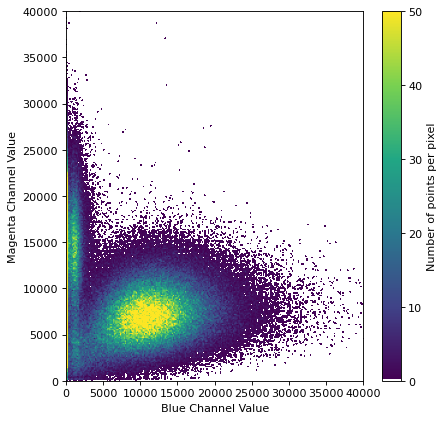

In [62]:
import mpl_scatter_density
from matplotlib.colors import Normalize
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)
fig = plt.figure(figsize=(6, 6), dpi = 80)
axi = fig.add_subplot(1, 1, 1, projection='scatter_density')
min_value = 0
max_value = 50
norm = Normalize(vmin=min_value, vmax=max_value)
# plt.scatter([val for ary in val1 for val in ary], [val for ary in val2 for val in ary], s = .1, cmap='white_viridis')
density = axi.scatter_density([val for ary in val1 for val in ary], [val for ary in val2 for val in ary], cmap=white_viridis, norm = norm)
#fig = plt.figure(figsize=(6, 6), dpi = 80)
fig.colorbar(density, label='Number of points per pixel')
# plt.title("Before Transcription")
plt.ylabel("Magenta Channel Value")
plt.xlabel("Blue Channel Value")
# "Viridis-like" colormap with white background
plt.xlim(0, 40000)
plt.ylim(0, 40000)
plt.savefig('Txn_25min_NT-A_NR-B.png', dpi=400)
plt.show()
